## Hw4-part 5 reference answer 

In [7]:
from scipy.sparse.linalg import eigs
def pca(X,m):
    X1 = X-np.mean(X,axis=0)  # subtract mean along x axis
    C=(1/(X1.shape[0]-1))*X1.T @ X1 # covariance 
    egval, egvc = eigs(C, k=m)   # find first m largest eigenvalue
    ind = egval.argsort()  # sort in descending order
    variances = egval[ind[::-1]]
    components = egvc[:,ind[::-1]]
    
    return components.real, variances.real # no imaginary part, but may need to convert for numerical reasons
    
    

### 5a

In [3]:
import numpy as np
from scipy.io import loadmat
face = np.double(loadmat('faces.mat')['Data'])
mface = np.max(face,axis=1,keepdims=1)    
face = face/mface # devide each img (i.e., each row) by its maximum pixel value

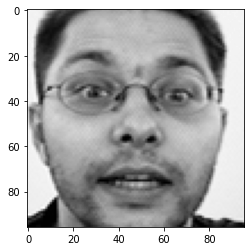

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(face[0,:].reshape(96,96),cmap='gray')

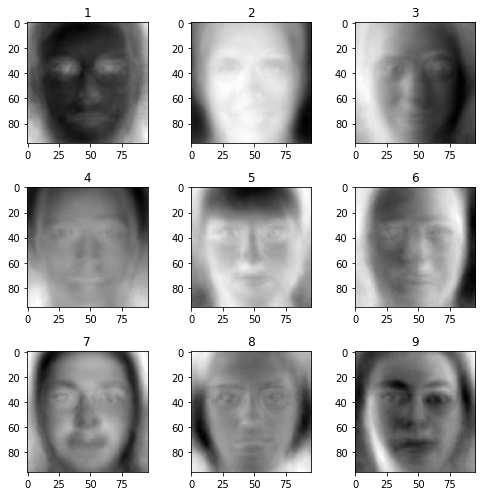

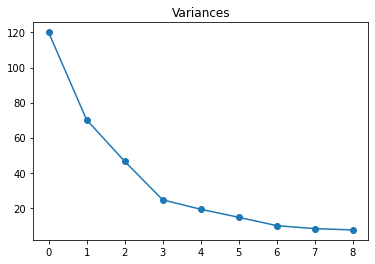

In [15]:
[components, variances] = pca(face, 9)
f,axes=plt.subplots(3,3,figsize=(7,7))
for i in range(9):
    ax = axes.ravel()[i]
    ax.imshow(components[:,i].reshape(96,96),cmap='gray')  
    ax.set_title(str(i+1))
f.tight_layout()
plt.show()
plt.plot(variances.real,'-o')
plt.title('Variances');

The eigenfaces, just like the "Y" PC above, tell us the regions of the images where there is high variability across data points. Thus, they should be relevant pixels to look for when trying to characterize or separate the data points into meaningful categories. In the case of faces, the most relevant features seem to be eyes, nose, presence of glasses... just like one would expect!

### 5b

In [10]:
# De-mean the data first!
face_demean = face-np.mean(face,axis=0) 
[U,s,Vt] = np.linalg.svd(face_demean,full_matrices=False)

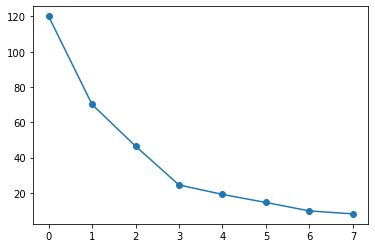

In [11]:
inds = np.argsort(s/(face.shape[0]))
s1=(s[inds[::-1]]**2)/(face.shape[0]-1)
plt.plot(s1[0:8],'-o')

In [13]:
#The rows of Vt are the eigenvectors of A^t A and the columns of U are the eigenvectors of A A^t
Vt = Vt[inds[::-1],:]  

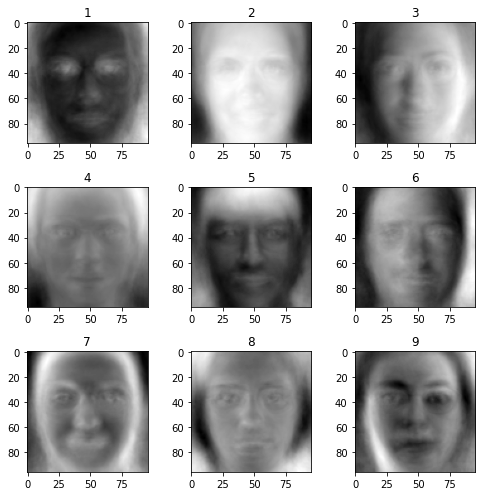

In [14]:
[components, variances] = pca(face, 9)
f,axes=plt.subplots(3,3,figsize=(7,7))
for i in range(9):
    ax = axes.ravel()[i]
    ax.imshow(Vt[i,:].reshape(96,96),cmap='gray')  
    ax.set_title(str(i+1))
f.tight_layout()
plt.show()


They are the same (except for possibly a sign change -- which doesn't matter since the principal directions don't change).

Consider the singular value decomp. of the matrix A: $A=USV'$. Then, the covariance matrix of A can be written as:

$cov(A) = \frac{1}{n-1} A^tA = \frac{1}{n-1} (USV^t)^t\ USV^t = \frac{1}{n-1} VS^tU^t\ USV^t$

From the definition of SVD, we know the columns of $U$ are orthonormal, so $U^tU = I$; also, $S^t = S$ since $S$ is diagonal. Therefore,

$\frac{1}{n-1} VS^tU^t\ USV^t = \frac{1}{n-1} VS^t I SV^t = \frac{1}{n-1} VS SV^t =  V\frac{S^2}{n-1}V^t$

Now, since V is orthogonal and S is a diagonal matrix, we have therefore diagonalized $cov(A)$:

$cov(A) = V\frac{S^2}{n-1}V^t$.

Rearranging, we see that the columns of $V$ are eigenvectors of $cov(A)$, and $\frac{s_i^2}{(n-1)}$ its eigenvalues:

$cov(A)V=V\frac{S^2}{n-1}=\frac{S^2}{n-1}V$

$cov(A)v_i=\frac{s_i^2}{n-1}v_i$


### 5c

In [19]:
import time

for full_matrices in [True,False]:
    ts = np.zeros((5,1))
    for i in range(5):
        t0 = time.time()
        [U,s,Vt] = np.linalg.svd(face,full_matrices=full_matrices)
        t1 = time.time()
        ts[i] = t1 - t0
    print('Mean using full_matrices=%s = %.2f' % (full_matrices,ts.mean()))


Mean using full_matrices=True = 7.30
Mean using full_matrices=False = 1.52


The mais reason the svd algorithm is faster is it utilizes a numerical
algorithm which does not require the covariance matrix
to be actually built. This saves a lot of time in terms of memory allocation
particularly for data sets in which the dimensionality p of each example
is high (as is the case for images -- lots pixels!), since size(cov) = [p, p].

Economy/not-full-matrices mode: 
Since A is rectangular (1st and 2nd dims differ in size),
 svd(A,'econ') returns fewer columns in U and fewer rows in S
  compared to a full decomposition. Extra rows of zeros in S 
 are excluded, along with the corresponding columns in U that would 
 multiply with those zeros in the expression A = U*S*V'.
 This also saves time.